In [8]:
%matplotlib inline
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager

In [2]:
secretNumber = '1000101'

In [3]:
circuit = QuantumCircuit(8,7)

In [4]:
circuit.h([0,1,2,3,4,5,6])
circuit.x(7)
circuit.h(7)

circuit.barrier()
circuit.cx(6,7)
circuit.cx(2,7)
circuit.cx(0,7)
circuit.barrier()
circuit.h([0,1,2,3,4,5,6])
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])


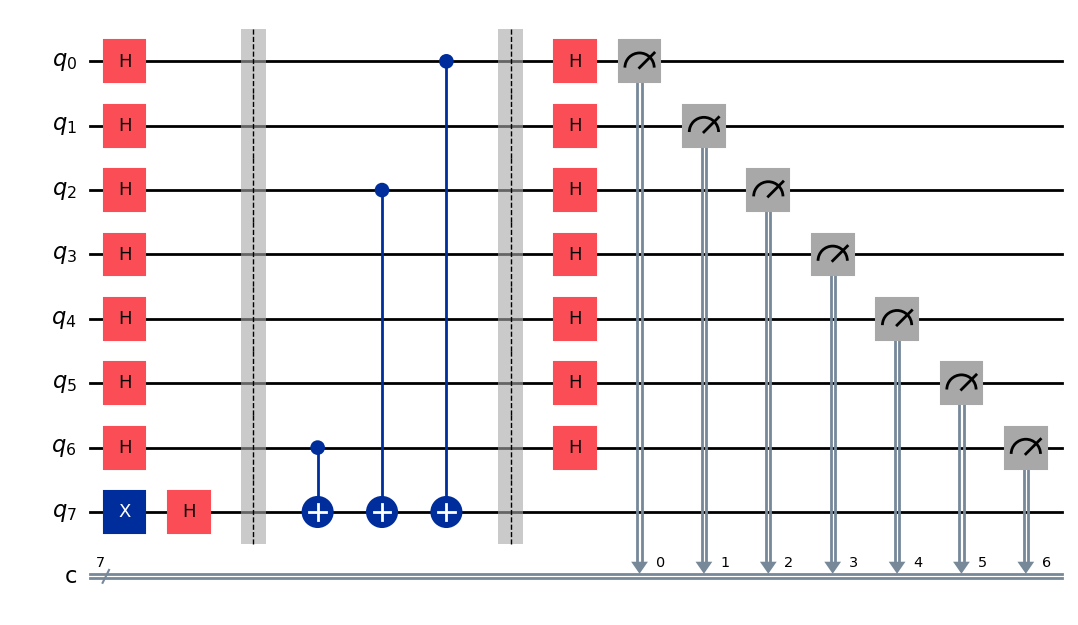

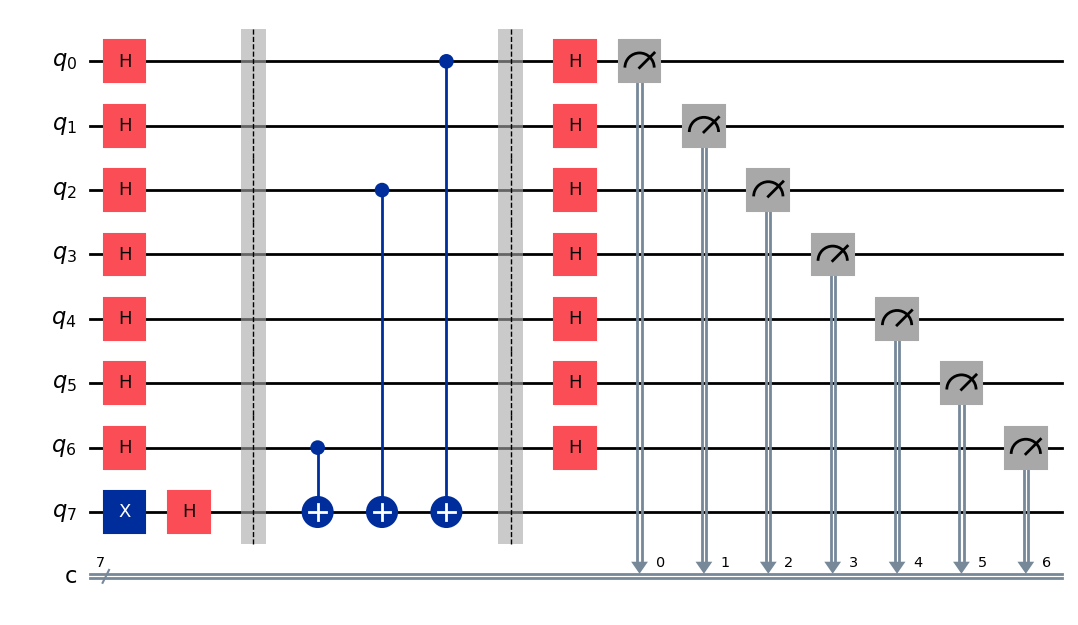

In [5]:
circuit.draw(output='mpl')

In [7]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

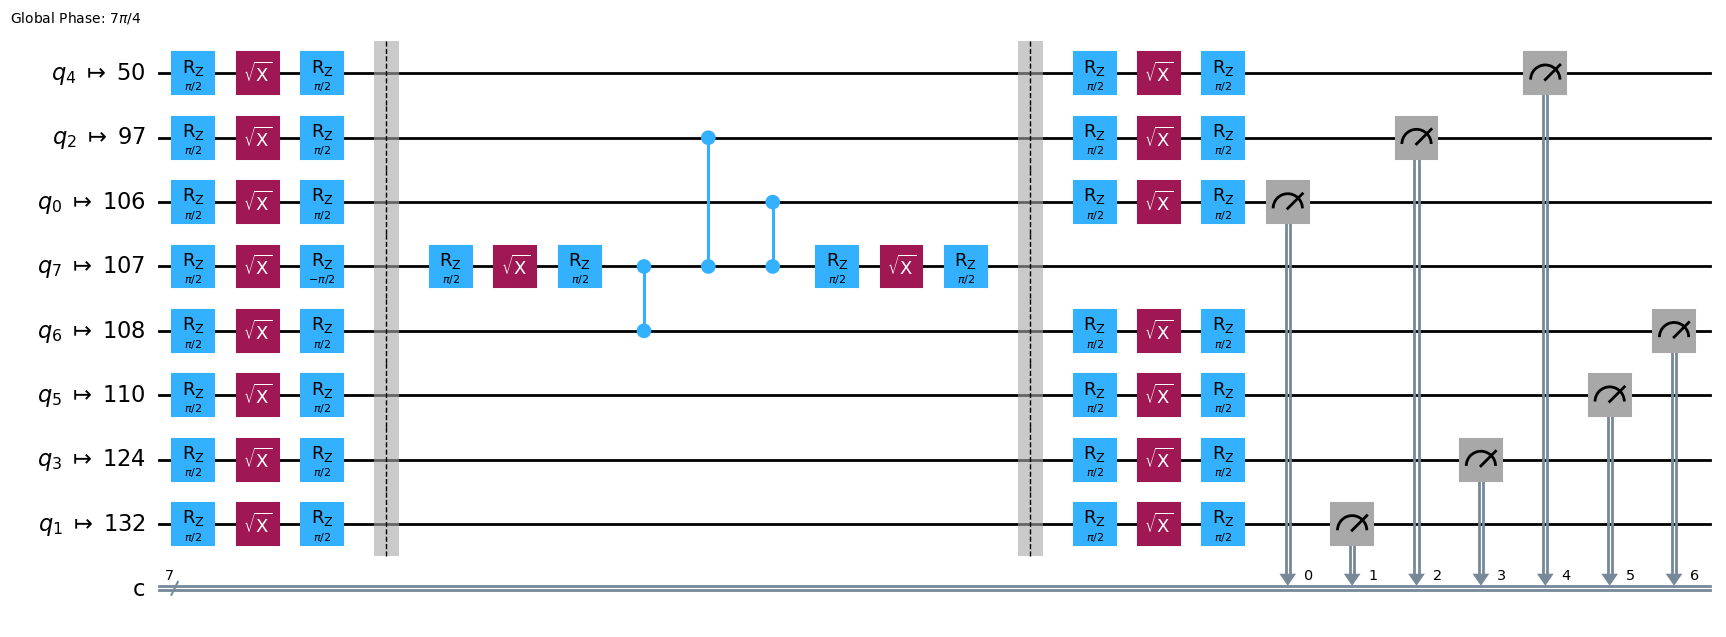

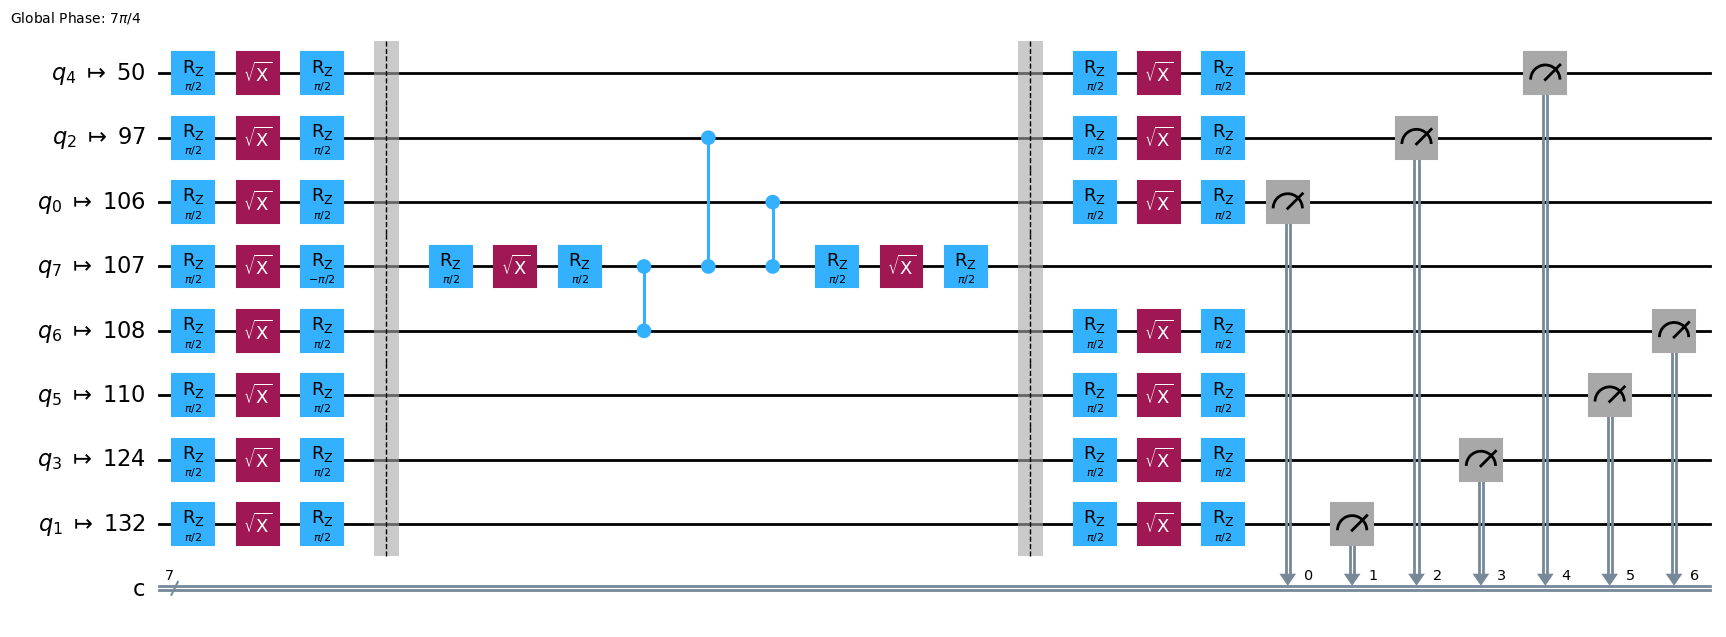

In [9]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
 
isa_circuit.draw("mpl", idle_wires=False)

In [12]:

# result = execute(circuit, backend=simulator, shots=1).result()
# counts = result.get_counts()
# print(counts)
sampler = Sampler(mode=backend)
jobSampler = sampler.run([isa_circuit], shots=1024)
result = jobSampler.result()
counts = result[0].data.c.get_counts()
print(counts)

{'1000101': 894, '0000101': 27, '1000011': 1, '1000001': 21, '1000000': 2, '1000111': 5, '1000100': 19, '1001101': 15, '1100101': 22, '0000000': 3, '1010101': 9, '0100101': 3, '0000001': 2, '1110101': 1}


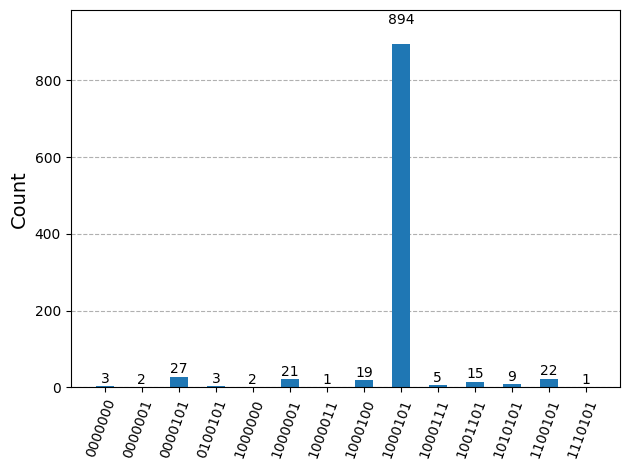

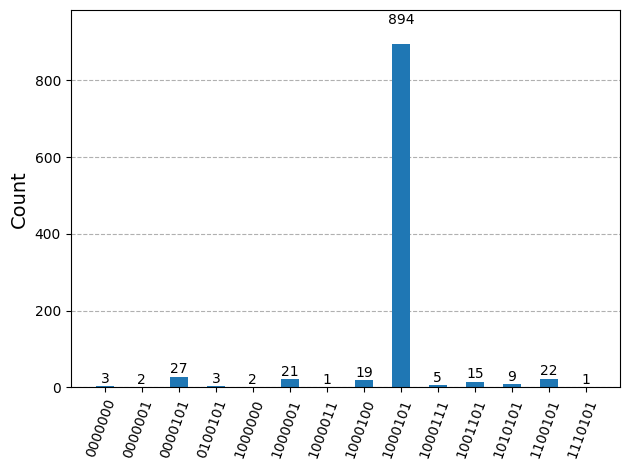

In [13]:
plot_histogram(counts)